
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

---

In [ ]:


import pandas as pd

In [15]:
s_p_500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies") 
sp500_table = s_p_500[0]
sp500_table_interest = sp500_table[["Symbol", "Security", "GICS Sector","Date added"]]
symbols_and_dates = sp500_table[['Symbol','Date added']].copy()
#get the number of stocks added each year
symbols_and_dates['Date added'] = pd.to_datetime(symbols_and_dates['Date added'])
symbols_and_dates['Year'] = symbols_and_dates['Date added'].dt.year
added_per_year = symbols_and_dates.groupby('Year').size().reset_index(name='Count')
added_per_year = added_per_year.sort_values(by='Count', ascending=False)


In [16]:

added_per_year

,Year,Count
0,1957,53
48,2017,23
47,2016,23
50,2019,22
39,2008,17
55,2024,16
53,2022,16
54,2023,15
52,2021,15
49,2018,14


In [19]:
#Additional: How many current S&P 500 stocks have been in the index for more than 20 years? 
# When stocks are added to the S&P 500,
# they usually experience a price bump as investors and index funds buy shares following the announcement.
current_date = pd.to_datetime('today')
long_term_stocks = symbols_and_dates[symbols_and_dates['Date added'] <= current_date - pd.Timedelta(days=365*20)]
long_term_count = long_term_stocks['Symbol'].nunique()
print(long_term_count)
long_term_stocks[['Symbol', 'Date added']].head(10)  # Displaying the first 10 long-term stocks

219


,Symbol,Date added
0,MMM,1957-03-04
2,ABT,1957-03-04
5,ADBE,1997-05-05
7,AES,1998-10-02
8,AFL,1999-05-28
9,A,2000-06-05
10,APD,1985-04-30
18,ALL,1995-07-13
21,MO,1957-03-04
24,AEE,1991-09-19



### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)


In [49]:
import yfinance as yf
major_stock_list = ['^GSPC', '000001.SS','^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX','^BVSP']
start_date = '2025-01-01'
end_date = '2025-05-01'
difference = pd.to_datetime(end_date) - pd.to_datetime(start_date)
data = pd.DataFrame()
for stock in major_stock_list:
    try:
        ticker = yf.Ticker(stock)
        df = ticker.history(period='1d', start=start_date, end=end_date)
        df['Symbol'] = stock
        df_filtered = df[df['Symbol'] == stock]
        df_filtered['ytd_change'] = (df_filtered['Close']/df_filtered['Close'].iloc[-1] - 1)
        df_filtered['ytd_change'] = df_filtered['ytd_change'].fillna(0)  # Fill NaN values with 0
        df.loc[df_filtered.index, 'ytd_change'] = df_filtered['ytd_change']
        df = df.reset_index()
        data = pd.concat([data, df], ignore_index=True, axis=0)
    except Exception as e:
        print(f"Error downloading {stock}: {e}")


In [50]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,ytd_change
0,2025-01-02 00:00:00-05:00,5903.259766,5935.089844,5829.529785,5868.549805,3621680000,0.0,0.0,^GSPC,0.053777
1,2025-01-03 00:00:00-05:00,5891.069824,5949.339844,5888.660156,5942.470215,3667340000,0.0,0.0,^GSPC,0.067051
2,2025-01-06 00:00:00-05:00,5982.810059,6021.040039,5960.009766,5975.379883,4940120000,0.0,0.0,^GSPC,0.072960
3,2025-01-07 00:00:00-05:00,5993.259766,6000.680176,5890.680176,5909.029785,4517330000,0.0,0.0,^GSPC,0.061046
4,2025-01-08 00:00:00-05:00,5910.660156,5927.890137,5874.779785,5918.250000,4441740000,0.0,0.0,^GSPC,0.062702
...,...,...,...,...,...,...,...,...,...,...
883,2025-04-24 00:00:00-03:00,132245.000000,134938.000000,132223.000000,134580.000000,14113400,0.0,0.0,^BVSP,-0.003606
884,2025-04-25 00:00:00-03:00,134579.000000,134992.000000,134186.000000,134739.000000,13051800,0.0,0.0,^BVSP,-0.002428
885,2025-04-28 00:00:00-03:00,134741.000000,135709.000000,134711.000000,135016.000000,11449700,0.0,0.0,^BVSP,-0.000378
886,2025-04-29 00:00:00-03:00,135017.000000,136150.000000,134899.000000,135093.000000,12761100,0.0,0.0,^BVSP,0.000192


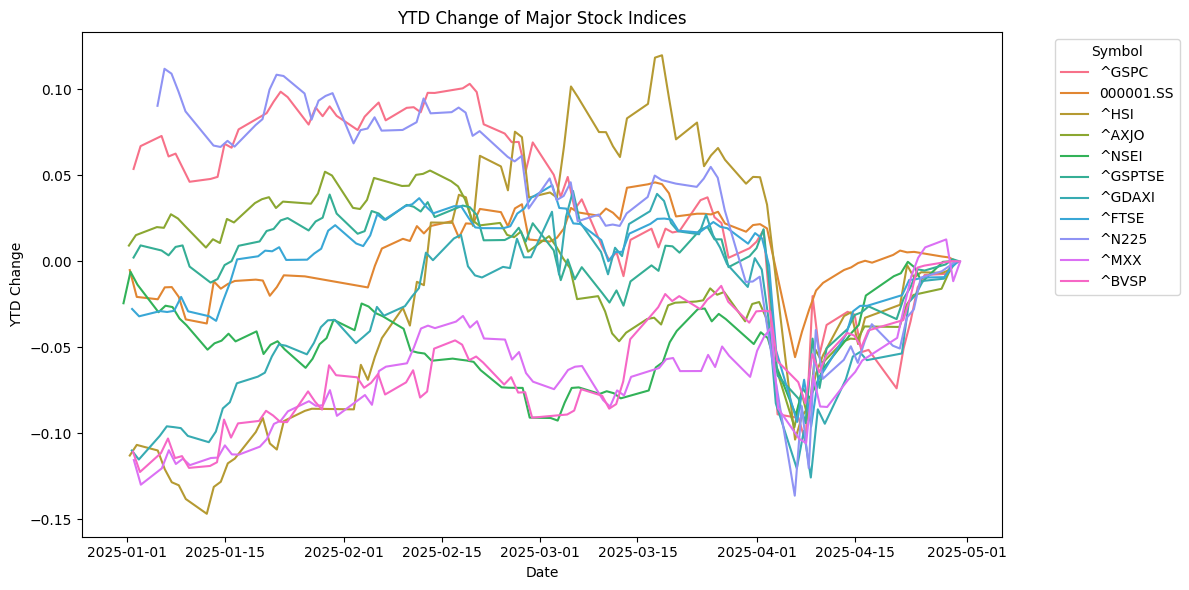

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='ytd_change', hue='Symbol')
plt.title('YTD Change of Major Stock Indices')
plt.xlabel('Date')
plt.ylabel('YTD Change')
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#better than S&P 500
last_data = data[data['Date']==pd.to_datetime(end_date)-pd.Timedelta(days=1)]


In [69]:
pd.to_datetime(end_date)-pd.Timedelta(days=2)

Timestamp('2025-04-29 00:00:00')